In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


=========================================================
Line, Poly and RegularPoly Collection with autoscaling
=========================================================

For the first two subplots, we will use spirals.  Their
size will be set in plot units, not data units.  Their positions
will be set in data units by using the "offsets" and "transOffset"
kwargs of the `~.collections.LineCollection` and
`~.collections.PolyCollection`.

The third subplot will make regular polygons, with the same
type of scaling and positioning as in the first two.

The last subplot illustrates the use of "offsets=(xo,yo)",
that is, a single tuple instead of a list of tuples, to generate
successively offset curves, with the offset given in data
units.  This behavior is available only for the LineCollection.




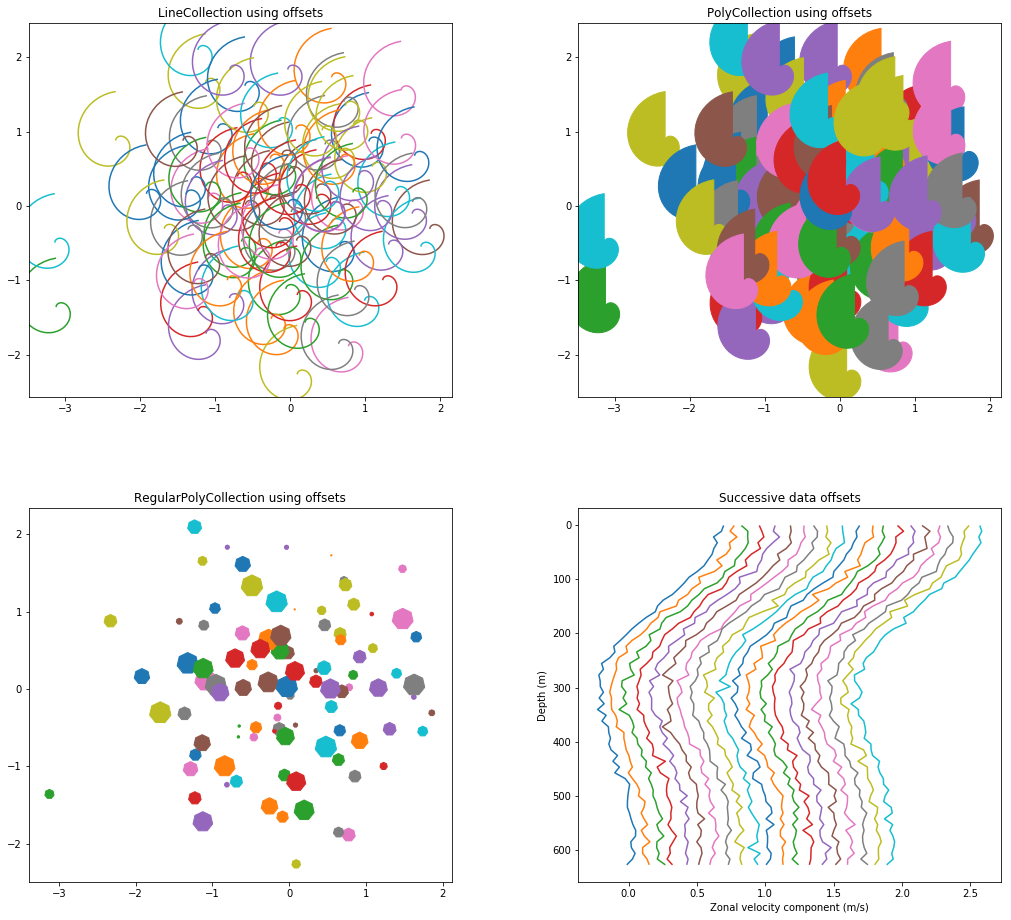

In [7]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import collections, colors, transforms
import numpy as np

matplotlib.rcParams['figure.figsize'] = [15,15]


nverts = 50
npts = 100

# Make some spirals
r = np.arange(nverts)
theta = np.linspace(0, 2*np.pi, nverts)
xx = r * np.sin(theta)
yy = r * np.cos(theta)
spiral = np.column_stack([xx, yy])

# Fixing random state for reproducibility
rs = np.random.RandomState(19680801)

# Make some offsets
xyo = rs.randn(npts, 2)

# Make a list of colors cycling through the default series.
colors = [colors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(top=0.92, left=0.07, right=0.97,
                    hspace=0.3, wspace=0.3)
((ax1, ax2), (ax3, ax4)) = axes  # unpack the axes


col = collections.LineCollection([spiral], offsets=xyo,
                                 transOffset=ax1.transData)
trans = fig.dpi_scale_trans + transforms.Affine2D().scale(1.0/72.0)
col.set_transform(trans)  # the points to pixels transform
# Note: the first argument to the collection initializer
# must be a list of sequences of x,y tuples; we have only
# one sequence, but we still have to put it in a list.
ax1.add_collection(col, autolim=True)
# autolim=True enables autoscaling.  For collections with
# offsets like this, it is neither efficient nor accurate,
# but it is good enough to generate a plot that you can use
# as a starting point.  If you know beforehand the range of
# x and y that you want to show, it is better to set them
# explicitly, leave out the autolim kwarg (or set it to False),
# and omit the 'ax1.autoscale_view()' call below.

# Make a transform for the line segments such that their size is
# given in points:
col.set_color(colors)

ax1.autoscale_view()  # See comment above, after ax1.add_collection.
ax1.set_title('LineCollection using offsets')


# The same data as above, but fill the curves.
col = collections.PolyCollection([spiral], offsets=xyo,
                                 transOffset=ax2.transData)
trans = transforms.Affine2D().scale(fig.dpi/72.0)
col.set_transform(trans)  # the points to pixels transform
ax2.add_collection(col, autolim=True)
col.set_color(colors)


ax2.autoscale_view()
ax2.set_title('PolyCollection using offsets')

# 7-sided regular polygons

col = collections.RegularPolyCollection(
    7, sizes=np.abs(xx) * 10.0, offsets=xyo, transOffset=ax3.transData)
trans = transforms.Affine2D().scale(fig.dpi / 72.0)
col.set_transform(trans)  # the points to pixels transform
ax3.add_collection(col, autolim=True)
col.set_color(colors)
ax3.autoscale_view()
ax3.set_title('RegularPolyCollection using offsets')


# Simulate a series of ocean current profiles, successively
# offset by 0.1 m/s so that they form what is sometimes called
# a "waterfall" plot or a "stagger" plot.

nverts = 60
ncurves = 20
offs = (0.1, 0.0)

yy = np.linspace(0, 2*np.pi, nverts)
ym = np.max(yy)
xx = (0.2 + (ym - yy) / ym) ** 2 * np.cos(yy - 0.4) * 0.5
segs = []
for i in range(ncurves):
    xxx = xx + 0.02*rs.randn(nverts)
    curve = np.column_stack([xxx, yy * 100])
    segs.append(curve)

col = collections.LineCollection(segs, offsets=offs)
ax4.add_collection(col, autolim=True)
col.set_color(colors)
ax4.autoscale_view()
ax4.set_title('Successive data offsets')
ax4.set_xlabel('Zonal velocity component (m/s)')
ax4.set_ylabel('Depth (m)')
# Reverse the y-axis so depth increases downward
ax4.set_ylim(ax4.get_ylim()[::-1])


plt.show()

------------

References
""""""""""

The use of the following functions, methods, classes and modules is shown
in this example:



In [ ]:
import matplotlib
matplotlib.figure.Figure
matplotlib.collections
matplotlib.collections.LineCollection
matplotlib.collections.RegularPolyCollection
matplotlib.axes.Axes.add_collection
matplotlib.axes.Axes.autoscale_view
matplotlib.transforms.Affine2D
matplotlib.transforms.Affine2D.scale